# Analyse exploratoire, traitements, modélisation des données

## 0 - Chargement des librairies et du dataset

In [77]:
import pandas as pd
from skimpy import skim 

import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


In [60]:
df = pd.read_csv(r'https://raw.githubusercontent.com/MaskiVal/DataSets/main/cancer_breast.csv')

## 1 - Exploration des données

#### 1.1.1 - Nombre de données, visualisation des colonnes du dataset

In [61]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [62]:
df.shape

(569, 33)

#### 1.1.2 - Observation des types de données

In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

#### 1.1.3 - Observation des valeurs Null

In [64]:
df_expl = df.drop(columns='Unnamed: 32', axis= 1)

df_expl[df_expl.isna().any(axis= 1)]

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst


Il n'y a pas de valeurs null dans le dataset mis à part sur la colonne Unamed : 32 --> 100% null

### 1.2 - Observation des variables numériques

#### 1.2.1 - Analyse de la distribution

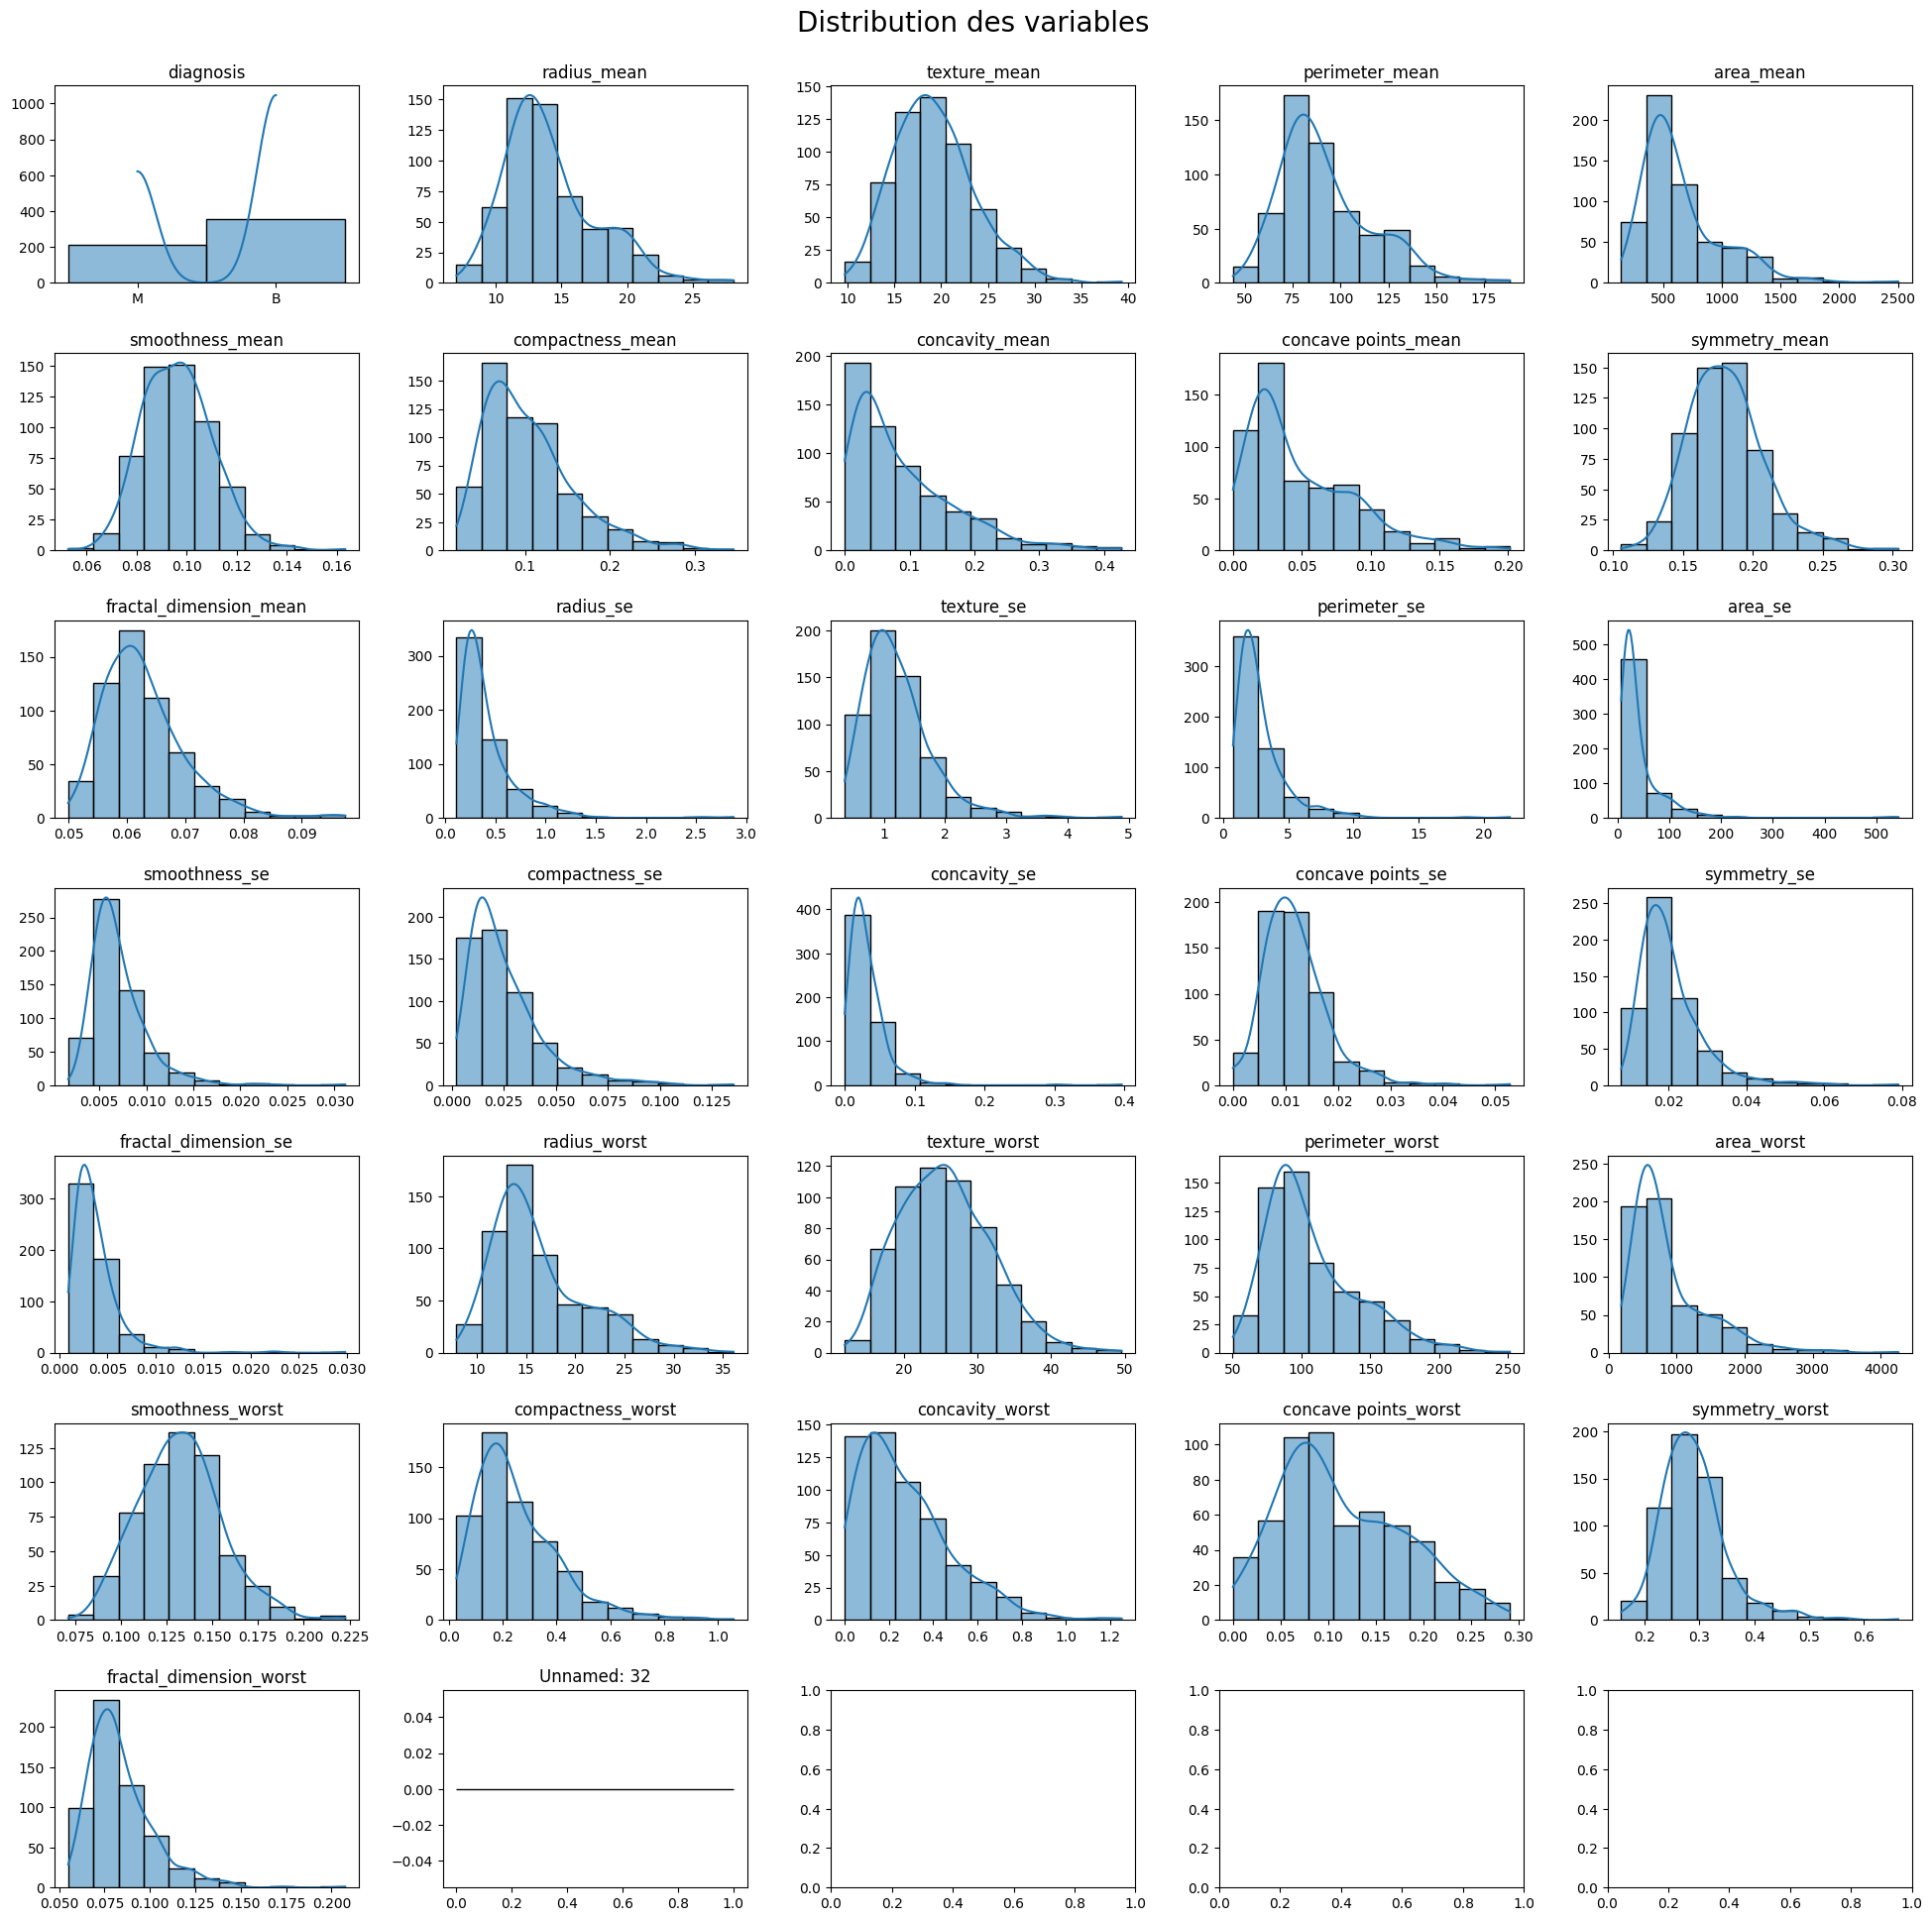

In [65]:
fig, axes = plt.subplots(7, 5, figsize=(20, 20))
fig.suptitle('Distribution des variables', fontsize=20)
fig.tight_layout(pad=3.0)

for i, col in enumerate(df.columns[1:]):
    sns.histplot(df[col], bins='sturges', kde=True, ax=axes[i//5, i%5])
    axes[i//5, i%5].set_title(col)
    axes[i//5, i%5].set_xlabel('')
    axes[i//5, i%5].set_ylabel('')

plt.show()

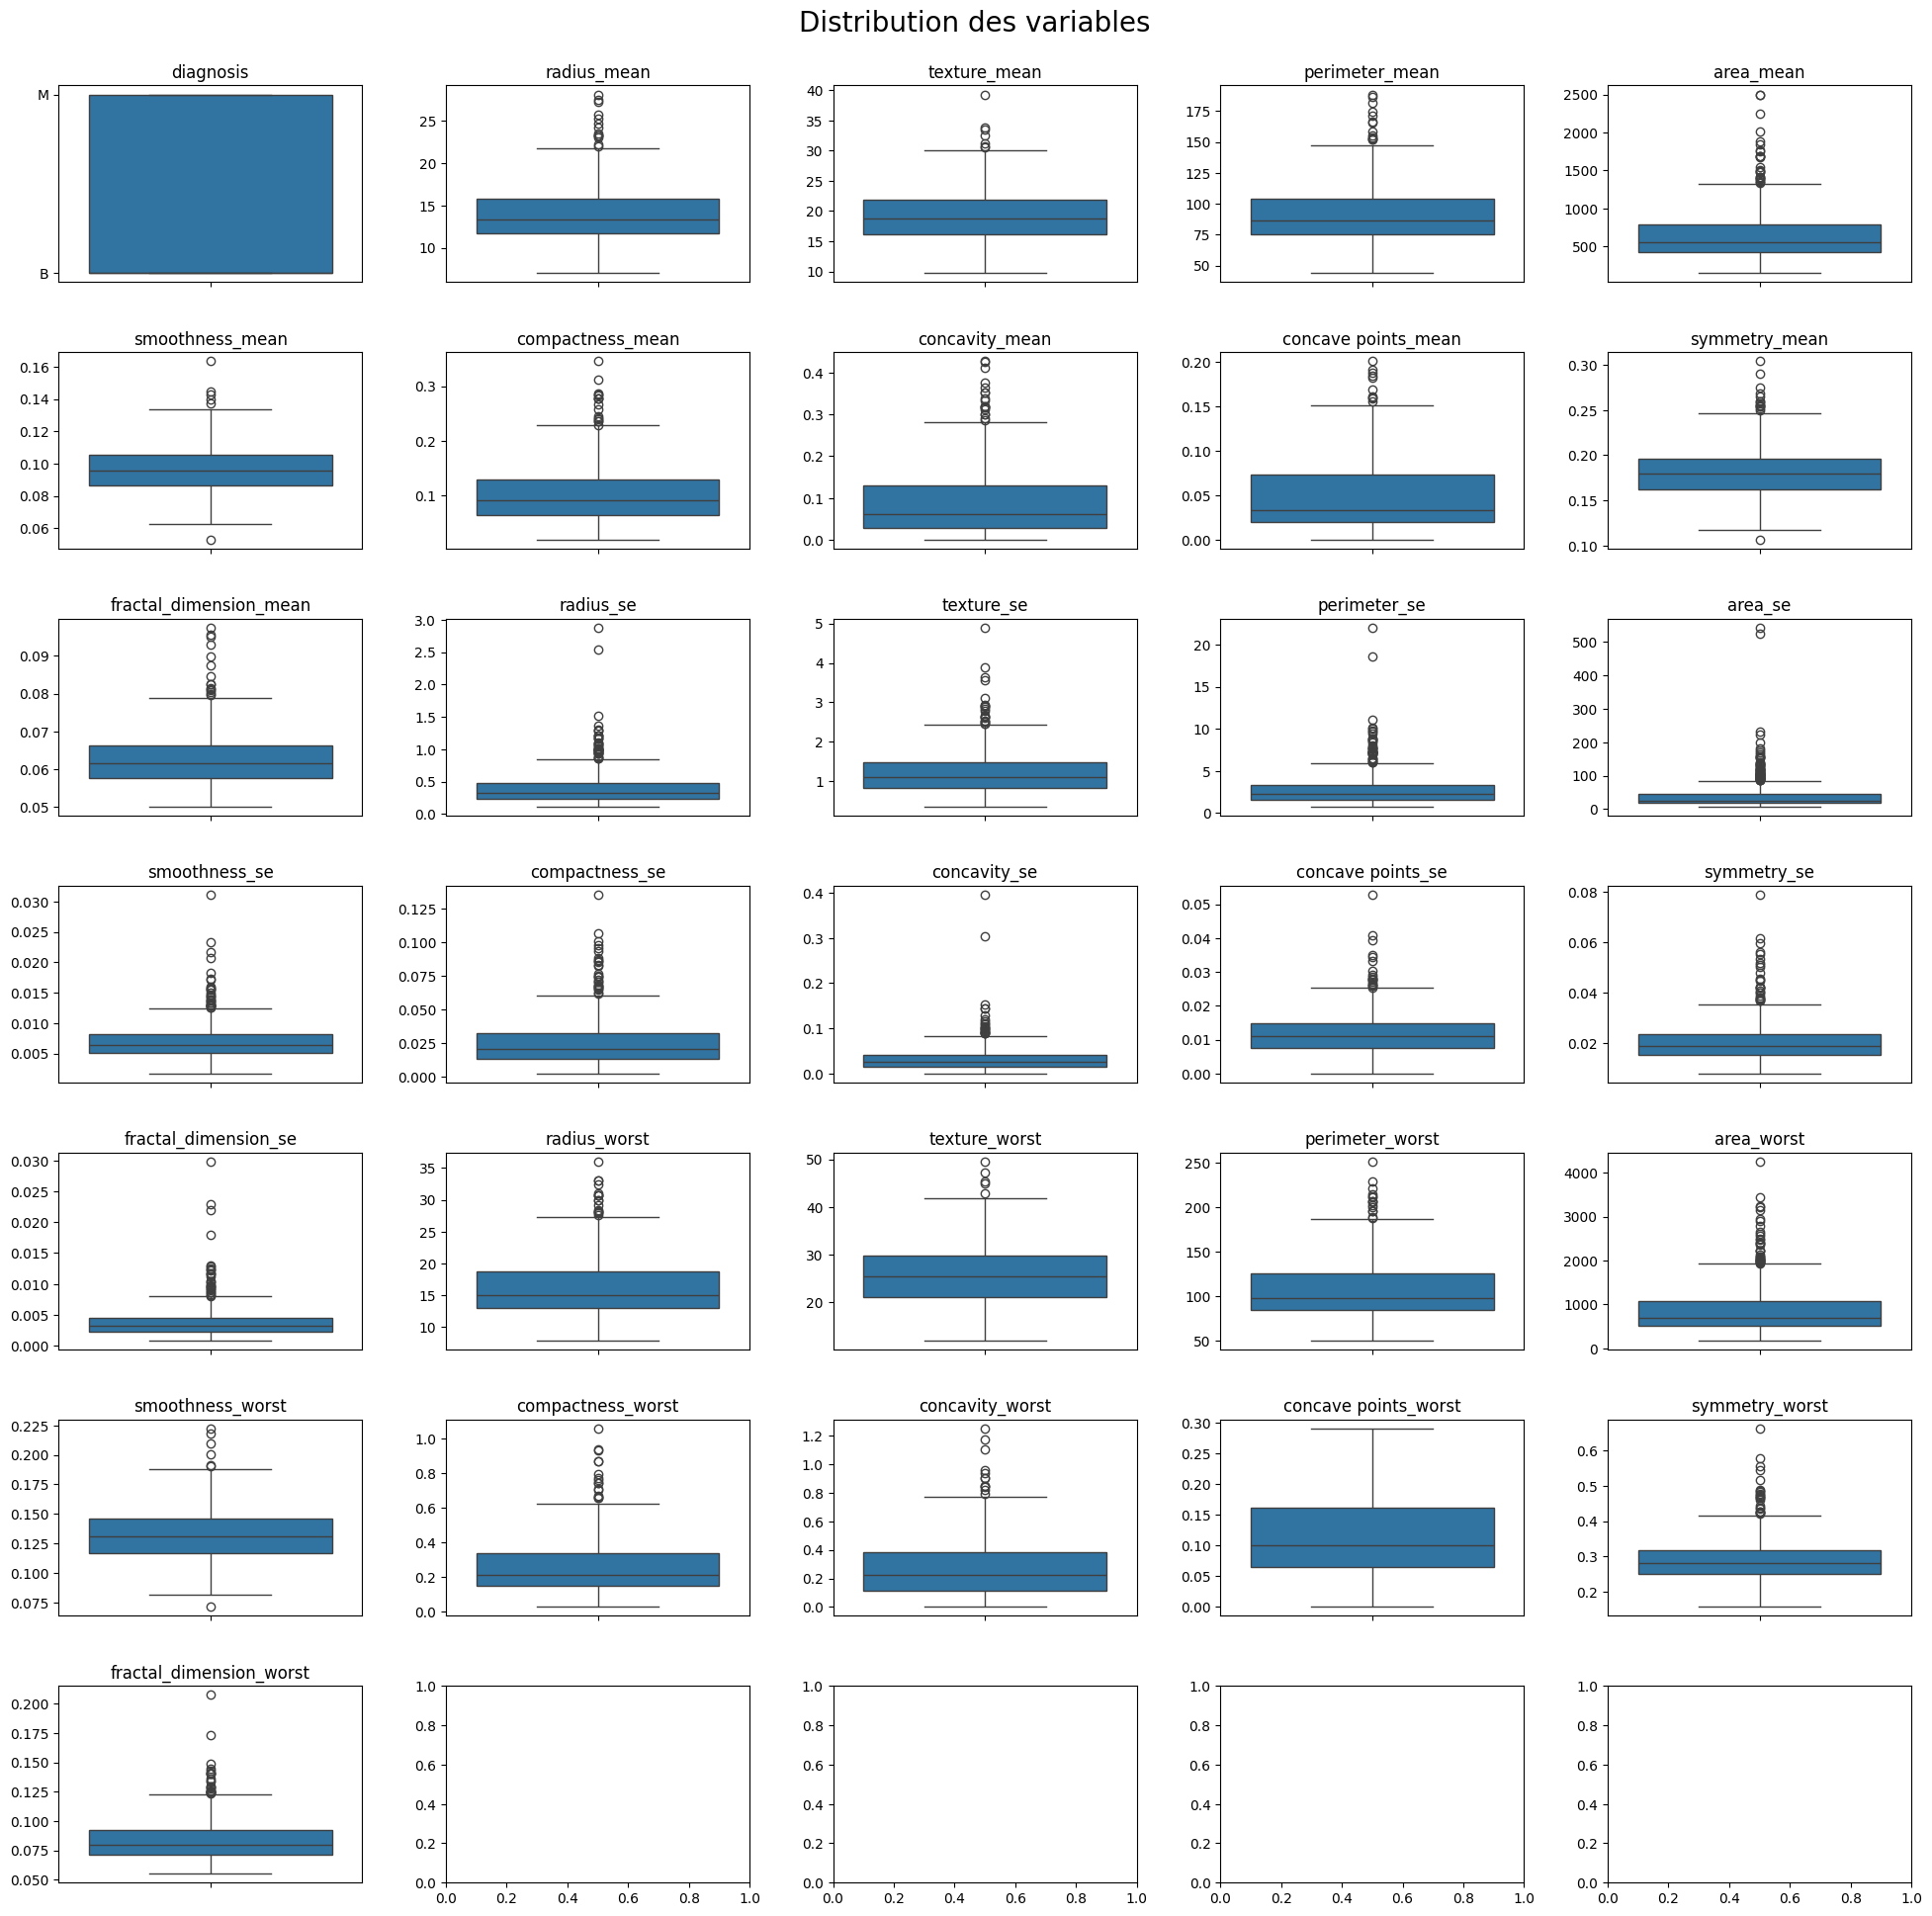

In [66]:
'''
Observation des data pour observer les outliers 
suite à l'observation des distributions sur les variables
'''

fig, axes = plt.subplots(7, 5, figsize=(20, 20))
fig.suptitle('Distribution des variables', fontsize=20)
fig.tight_layout(pad=3.0)

for i, col in enumerate(df_expl.columns[1:]):
    sns.boxplot(df_expl[col],  ax=axes[i//5, i%5])
    axes[i//5, i%5].set_title(col)
    axes[i//5, i%5].set_xlabel('')
    axes[i//5, i%5].set_ylabel('')

plt.show()

D'après les définitions des variables et les valeurs attendu il ne devraient y avoir des outliers que sur la patie supérieures (et non en dessous de Q1)
#### Commentaire sur les outliers Q1:
Symetry mean : les outliers petit n'ont pas de sens et semble être une valeure abérante
Smoothness mean et worst : l'outliers faible montre une celule très lisse , la valeure semble abérante

#### Commentaires sur les outliers Q3:
L'ensembles des outliers de ce type pourrait correspondre à des carractéristiques de cellules Malines -> avec mon niveau de connaissance, je ne peut pas me prononcer sur le fait que ce soient des valeurs abérantes ou non.

#### 1.2.2 - Analyse statique descriptive de base

In [67]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,569.0,3.037183e+07,1.250206e+08,8670.000000,869218.000000,906024.000000,8.813129e+06,9.113205e+08
radius_mean,569.0,1.412729e+01,3.524049e+00,6.981000,11.700000,13.370000,1.578000e+01,2.811000e+01
texture_mean,569.0,1.928965e+01,4.301036e+00,9.710000,16.170000,18.840000,2.180000e+01,3.928000e+01
perimeter_mean,569.0,9.196903e+01,2.429898e+01,43.790000,75.170000,86.240000,1.041000e+02,1.885000e+02
area_mean,569.0,6.548891e+02,3.519141e+02,143.500000,420.300000,551.100000,7.827000e+02,2.501000e+03
smoothness_mean,569.0,9.636028e-02,1.406413e-02,0.052630,0.086370,0.095870,1.053000e-01,1.634000e-01
compactness_mean,569.0,1.043410e-01,5.281276e-02,0.019380,0.064920,0.092630,1.304000e-01,3.454000e-01
concavity_mean,569.0,8.879932e-02,7.971981e-02,0.000000,0.029560,0.061540,1.307000e-01,4.268000e-01
concave points_mean,569.0,4.891915e-02,3.880284e-02,0.000000,0.020310,0.033500,7.400000e-02,2.012000e-01
symmetry_mean,569.0,1.811619e-01,2.741428e-02,0.106000,0.161900,0.179200,1.957000e-01,3.040000e-01


### 1.3 - Observation des variables catégoritielles

#### 1.3.1 - Analyse du nombre de valeurs unique

In [68]:
df['diagnosis'].unique()

array(['M', 'B'], dtype=object)

In [69]:
df['diagnosis'].value_counts(normalize=True)

diagnosis
B    0.627417
M    0.372583
Name: proportion, dtype: float64

#### 1.3.2 - Analyse des  statistique de base

In [70]:
'''
L'analyse n'est pas nécessaire sur les données catégoritiles, uniquement le diagnostique
'''

"\nL'analyse n'est pas nécessaire sur les données catégoritiles, uniquement le diagnostique\n"

## 2 - Nettoyage des données

### 2.1 - Traitement des valeurs manquantes

In [71]:
'''
Aucune valeur manquante ormis sur le uname:32 --> drop de la colonne
'''
df.drop(columns='Unnamed: 32', axis= 1, inplace=True)

### 2.2 - Traitement des doublons

In [72]:
'''
Aucun doublon dans le dataset en se basant sur la colonne d'index
les autres valeurs sont des valeurs continues avec une distrubution qui semble conforme
'''

"\nAucun doublon dans le dataset en se basant sur la colonne d'index\nles autres valeurs sont des valeurs continues avec une distrubution qui semble conforme\n"

### 2.3 - Traitement des valeurs abérantes

In [73]:
def remove_outliers_iqr(df):
    numeric_columns = df.select_dtypes(include=['number']).columns

    for column in numeric_columns[1:]:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1

        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # suppression des outliers Q1 -1.5*IQR
        df = df[(df[column] >= lower_bound)]
        # supp des outiliers Q3+1.5
        # df = df[(df[column] <= upper_bound)]
    
    return df

In [74]:
df_cleaned = remove_outliers_iqr(df)

## 3 - Visualisation des données nettoyées

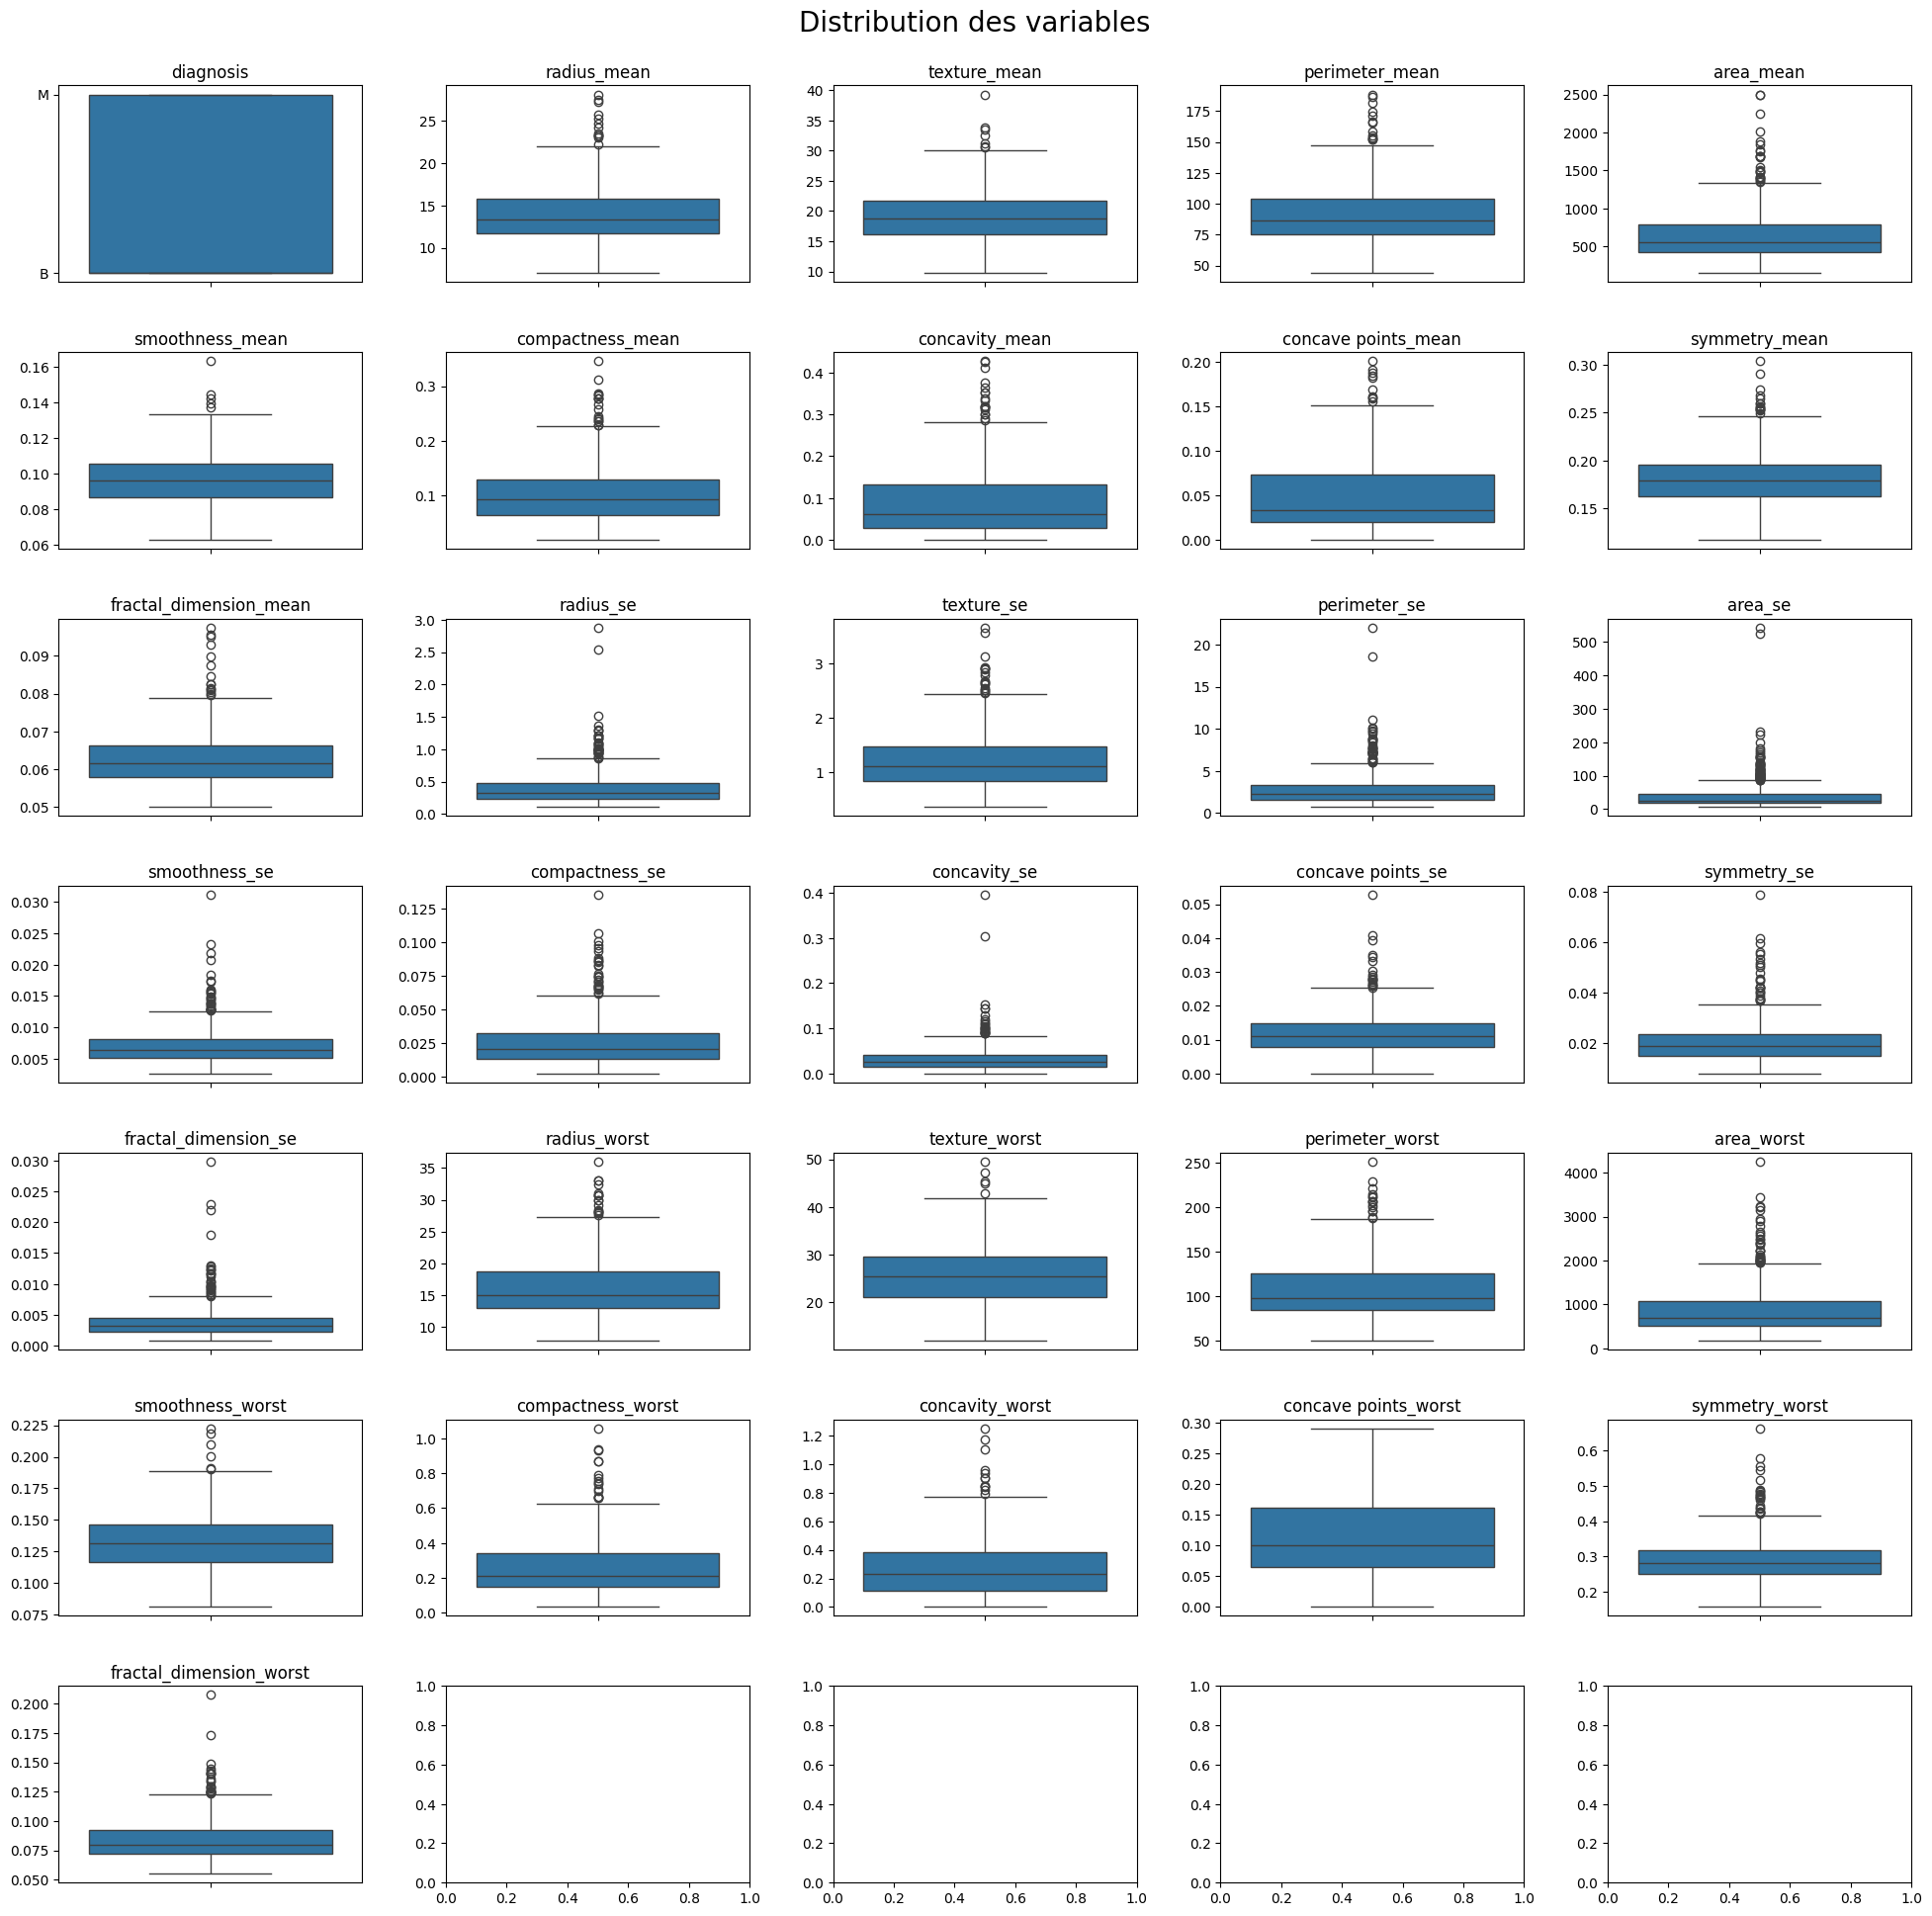

In [75]:
'''
Observation des data pour observer les outliers 
suite à l'observation des distributions sur les variables
'''

fig, axes = plt.subplots(7, 5, figsize=(20, 20))
fig.suptitle('Distribution des variables', fontsize=20)
fig.tight_layout(pad=3.0)

for i, col in enumerate(df_cleaned.columns[1:]):
    sns.boxplot(df_cleaned[col],  ax=axes[i//5, i%5])
    axes[i//5, i%5].set_title(col)
    axes[i//5, i%5].set_xlabel('')
    axes[i//5, i%5].set_ylabel('')

plt.show()

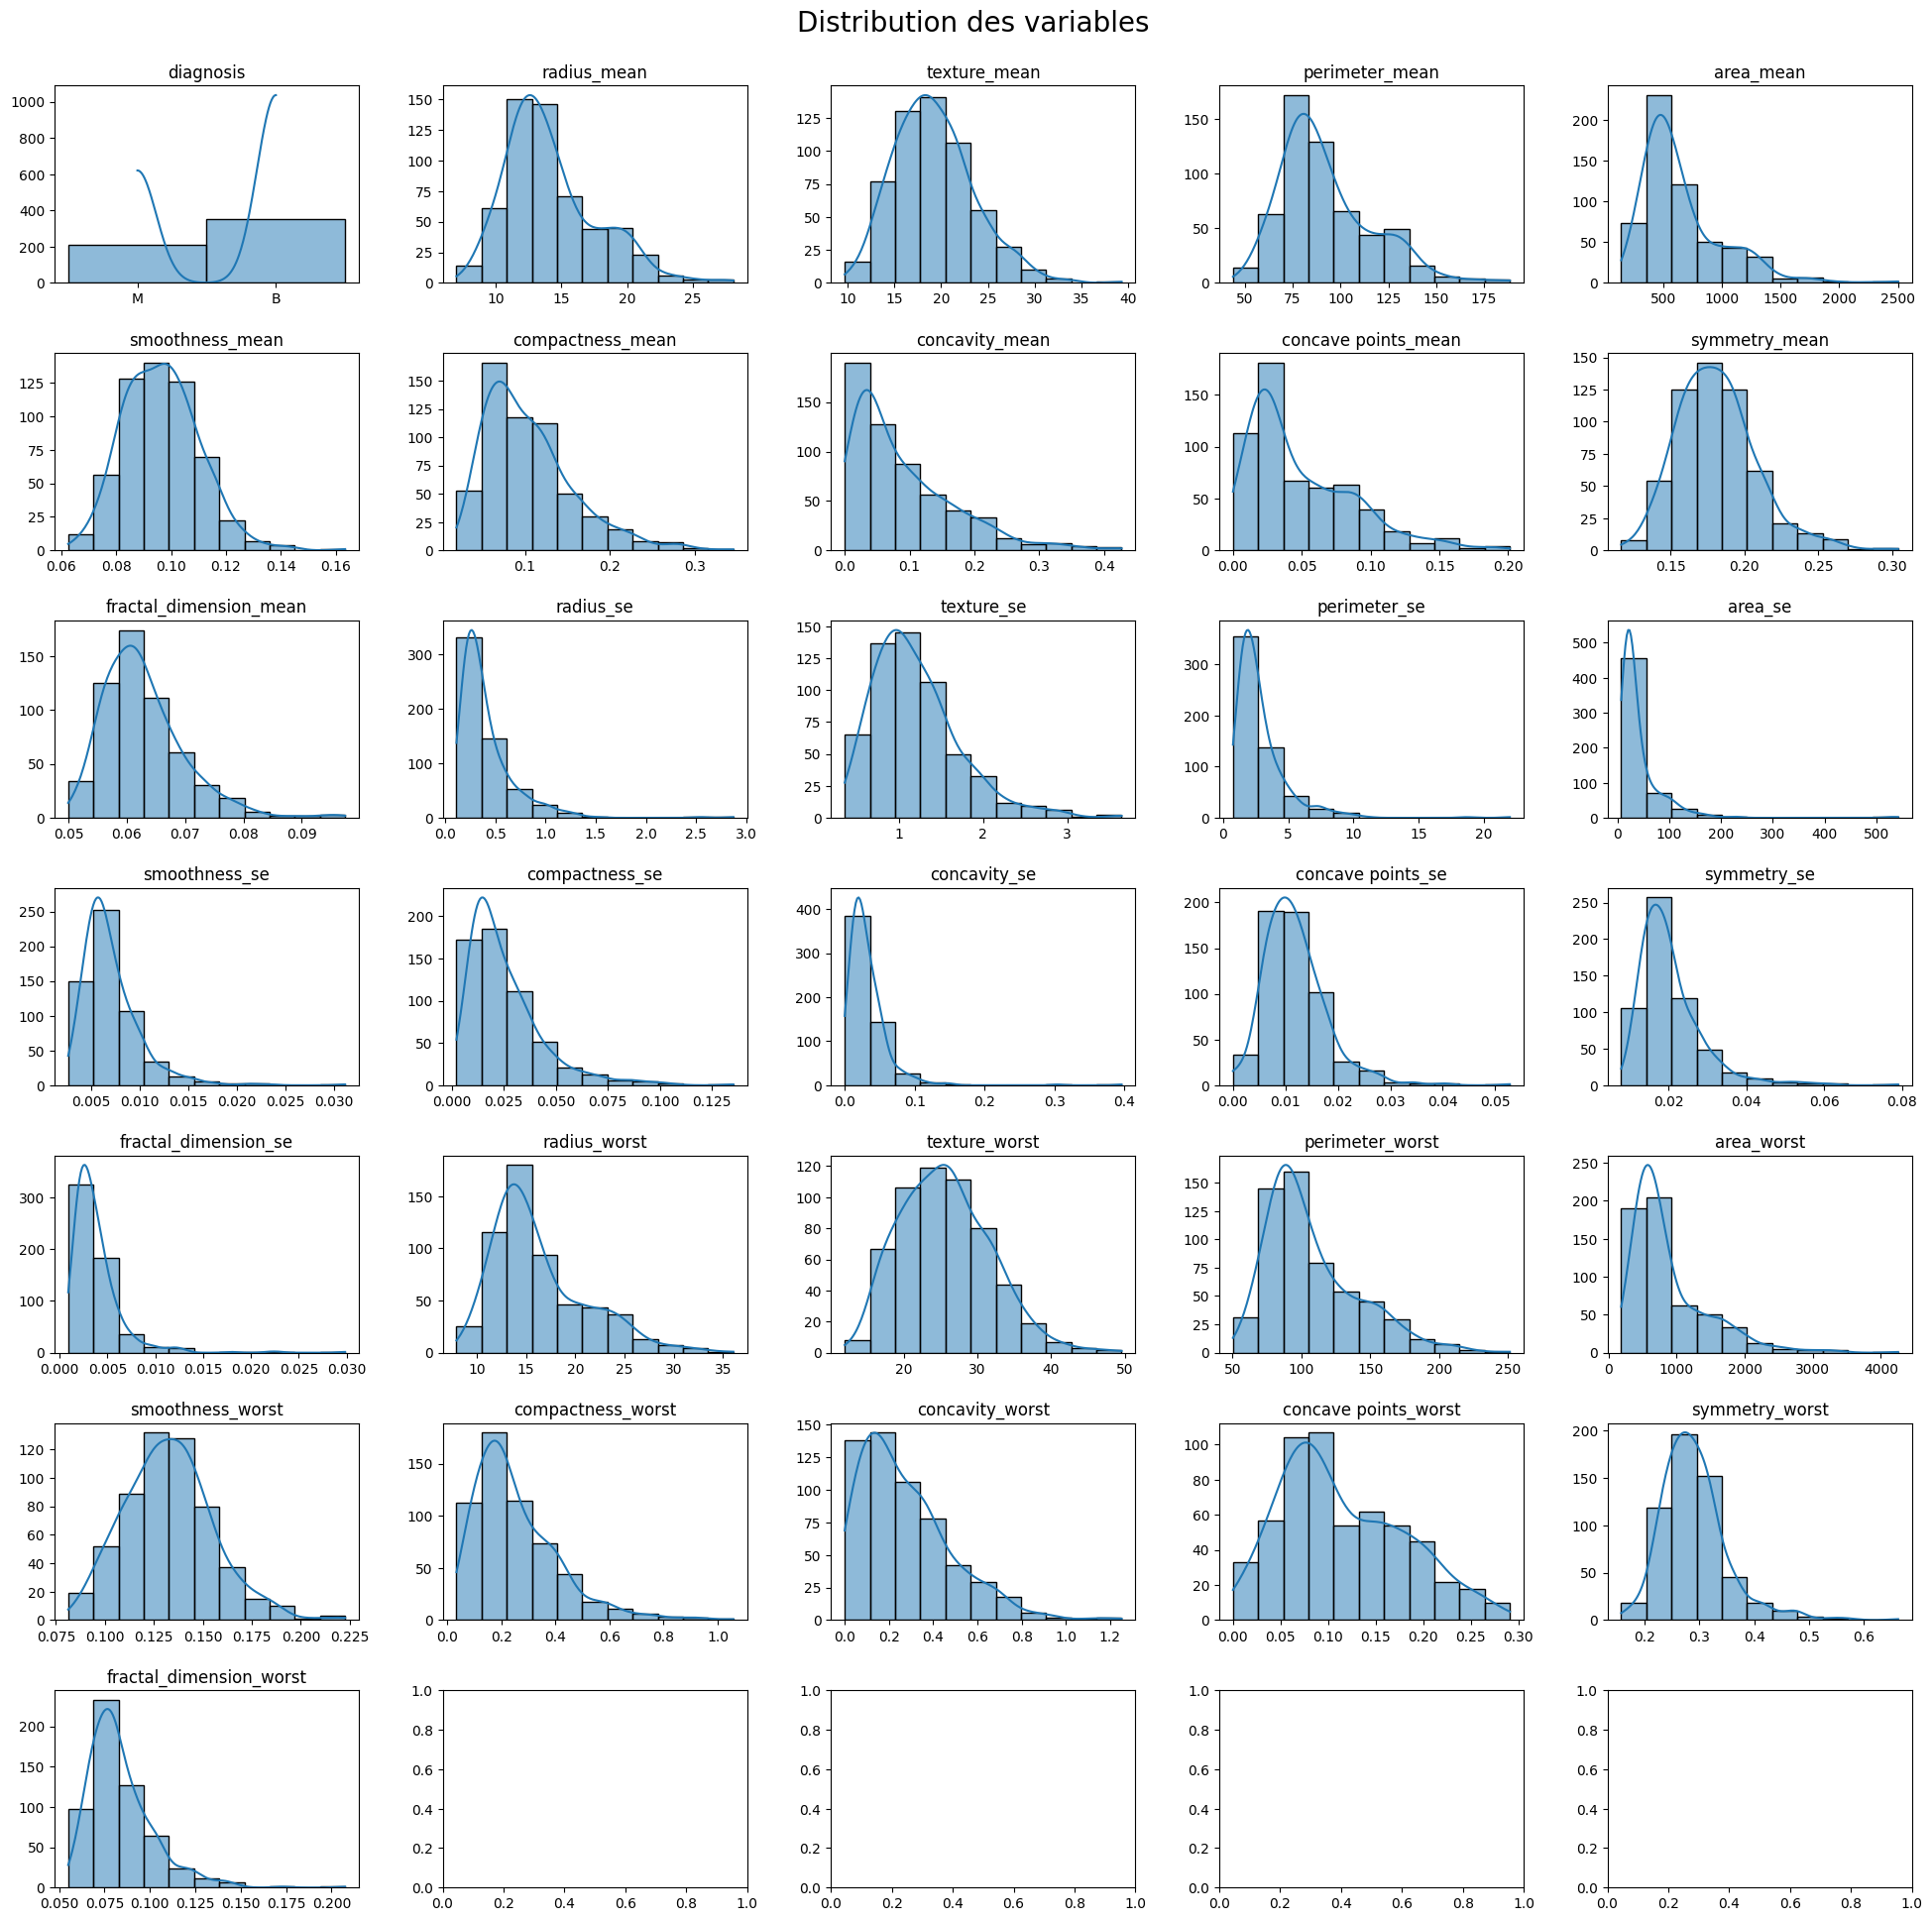

In [76]:
fig, axes = plt.subplots(7, 5, figsize=(20, 20))
fig.suptitle('Distribution des variables', fontsize=20)
fig.tight_layout(pad=3.0)

for i, col in enumerate(df_cleaned.columns[1:]):
    sns.histplot(df_cleaned[col], bins='sturges', kde=True, ax=axes[i//5, i%5])
    axes[i//5, i%5].set_title(col)
    axes[i//5, i%5].set_xlabel('')
    axes[i//5, i%5].set_ylabel('')

plt.show()

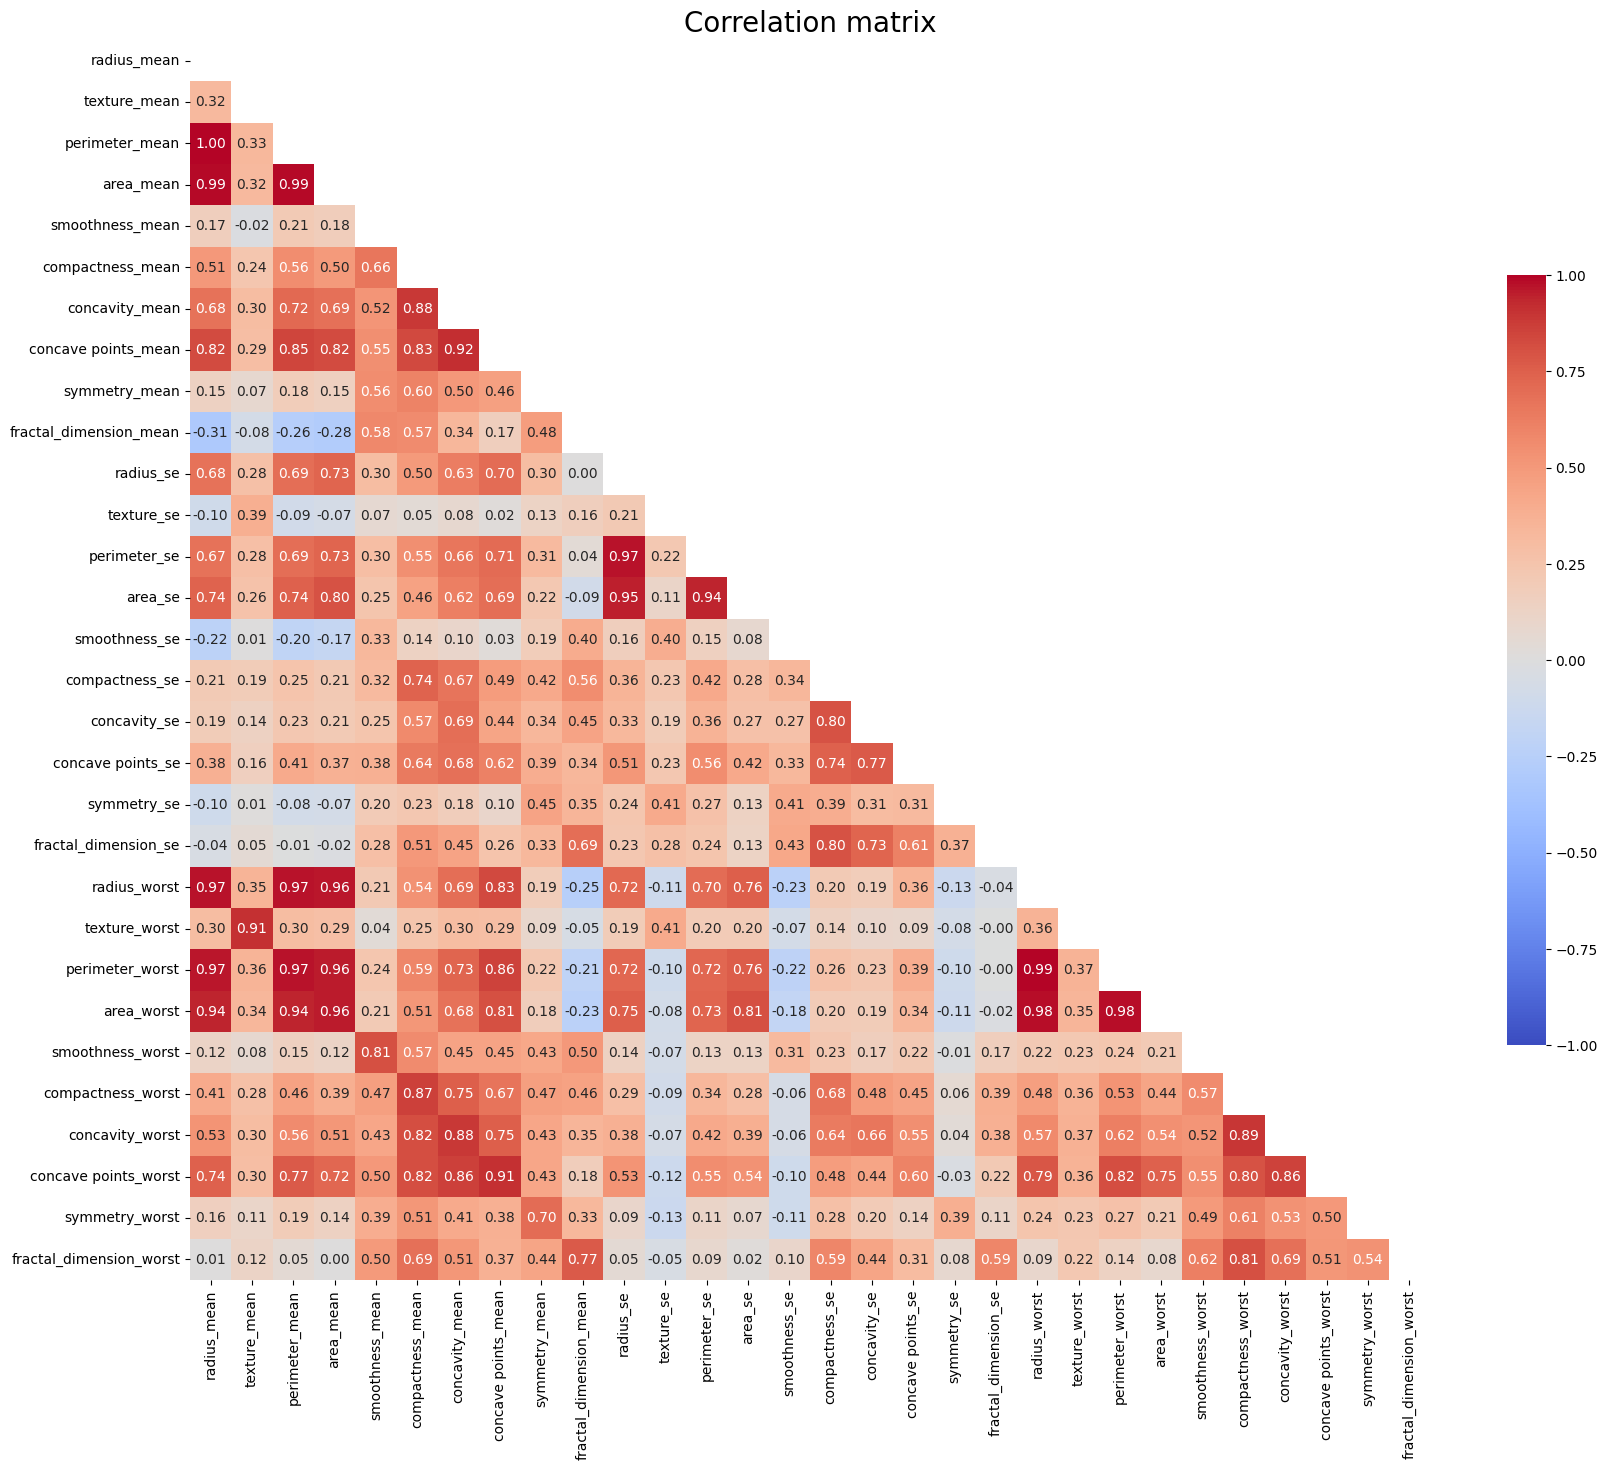

In [89]:
# observation des corrélations
list_columns_corr = [col for col in df.columns if (col != 'id') and (col != 'diagnosis')]


plt.figure(figsize=(20, 20))
corr = df[list_columns_corr].corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr, mask=mask, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .5}, vmin=-1, vmax=1)
plt.title('Correlation matrix', fontsize=20)
plt.show()

## 4 - Préparation des données - prétraitement

### 4.1 - Preparation des pipeline de transformations